In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Tuesday-WorkingHours.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Monday-WorkingHours.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
/kaggle/input/network-intrusion-dataset/Wednesday-workingHours.pcap_ISCX.csv


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC

from keras import callbacks
from keras.layers import BatchNormalization, Dense, Dropout, LSTM
from keras.models import Sequential
from keras.optimizers import Adam

from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings('ignore')

# **DDOS LOIC Dataset importation**

In [4]:
df=pd.read_csv('/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

# **Support Vector Machine**

## **Exploratory Data Analysis (EDA)**

In [5]:
label_disc = df[' Label'].unique()
print(label_disc)

['BENIGN' 'DDoS']


In [6]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


## **Data Transformation**

In [7]:
df[' Label'] = df[' Label'].map({'BENIGN': 0, 'DDoS': 1})
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [8]:
ddos_data = df[df[' Label'] == 1]
print(ddos_data)

         Destination Port   Flow Duration   Total Fwd Packets  \
18883                  80         1293792                   3   
18884                  80         4421382                   4   
18885                  80         1083538                   3   
18886                  80        80034360                   8   
18887                  80          642654                   3   
...                   ...             ...                 ...   
197538                 80          163071                   4   
197539                 80            2036                   3   
197540                 80          159465                   4   
197541                 80            1453                   3   
197542                 80          155039                   4   

         Total Backward Packets  Total Length of Fwd Packets  \
18883                         7                           26   
18884                         0                           24   
18885                      

In [9]:
df.dtypes

 Destination Port                int64
 Flow Duration                   int64
 Total Fwd Packets               int64
 Total Backward Packets          int64
Total Length of Fwd Packets      int64
                                ...   
Idle Mean                      float64
 Idle Std                      float64
 Idle Max                        int64
 Idle Min                        int64
 Label                           int64
Length: 79, dtype: object

In [10]:
df_filled = df.fillna(0)

In [11]:
X = df_filled[[' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', 'Flow Bytes/s', ' Flow Packets/s']].values
y = df_filled[' Label']
print(y)

0         0
1         0
2         0
3         0
4         0
         ..
225740    0
225741    0
225742    0
225743    0
225744    0
Name:  Label, Length: 225745, dtype: int64


## **Model Development**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
from sklearn.impute import SimpleImputer
X_train = np.where(np.isinf(X_train), 0, X_train)
imputer = SimpleImputer(strategy='constant', fill_value=0)
X_train_filled = imputer.fit_transform(X_train)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_filled)

In [13]:
model = SVC()
model.fit(X_scaled, y_train)

SVC()

## **Validation, Visualization and Accuracy**

In [14]:
X_test = np.where(np.isinf(X_test), 0, X_test)
imptuter = SimpleImputer(strategy='constant', fill_value=0)
X_test_filled = imputer.fit_transform(X_test)
X_scaled_test = scaler.fit_transform(X_test_filled)
y_pred = model.predict(X_scaled_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(y_pred)

Mean Squared Error: 0.006877228731533368
[1 0 0 ... 1 0 1]


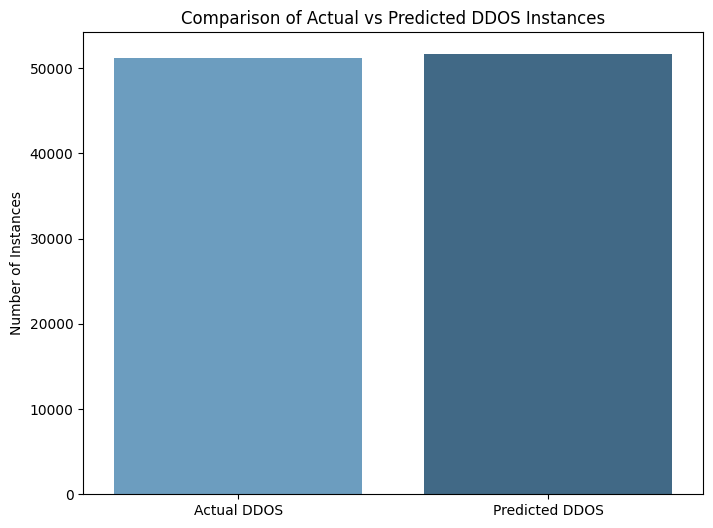

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
ddos_actual = (y_test == 1).sum()
ddos_predicted = (y_pred == 1).sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=["Actual DDOS", "Predicted DDOS"], y=[ddos_actual, ddos_predicted], palette="Blues_d")
plt.title("Comparison of Actual vs Predicted DDOS Instances")
plt.ylabel("Number of Instances")
plt.show()

In [16]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='binary')
print(f1)

0.9939564984672279


# **AutoRegressive Neural Network**

## **Exploratory Data Analysis (EDA)**

In [17]:
data = pd.read_csv("/kaggle/input/network-intrusion-dataset/Friday-WorkingHours-Morning.pcap_ISCX.csv")
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3268,112740690,32,16,6448,1152,403,0,201.5,204.724205,...,32,3.594286e+02,1.199802e+01,380,343,16100000.0,4.988048e+05,16400000,15400000,BENIGN
1,389,112740560,32,16,6448,5056,403,0,201.5,204.724205,...,32,3.202857e+02,1.574499e+01,330,285,16100000.0,4.987937e+05,16400000,15400000,BENIGN
2,0,113757377,545,0,0,0,0,0,0.0,0.000000,...,0,9.361829e+06,7.324646e+06,18900000,19,12200000.0,6.935824e+06,20800000,5504997,BENIGN
3,5355,100126,22,0,616,0,28,28,28.0,0.000000,...,32,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
4,0,54760,4,0,0,0,0,0,0.0,0.000000,...,0,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN


In [18]:
data.columns = data.columns.str.strip()

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Label']= encoder.fit_transform(data['Label'])

<Axes: xlabel='Label', ylabel='count'>

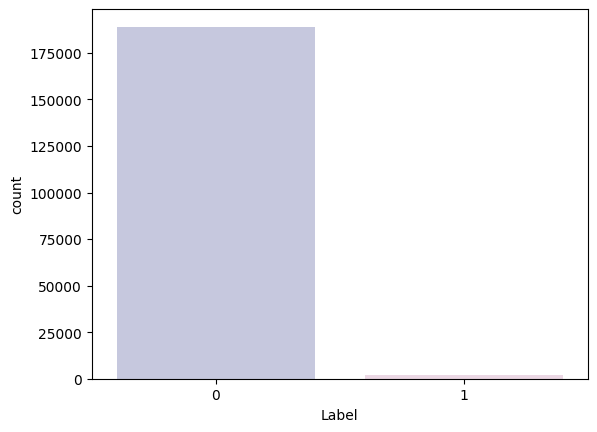

In [20]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
cols= ["#C2C4E2","#EED4E5"]
sns.countplot(x= data['Label'], palette= cols)

In [21]:
# Get list of neumeric variables
t = (data.dtypes == "float64")
num_cols = list(t[t].index)

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Fwd IAT Mean', 'Fwd IAT Std', 'Bwd IAT Mean', 'Bwd IAT Std', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Active Mean', 'Active Std', 'Idle Mean', 'Idle Std']


In [22]:
# Missing values in numeric variables

for i in num_cols:
    print(i, data[i].isnull().sum())

Fwd Packet Length Mean 0
Fwd Packet Length Std 0
Bwd Packet Length Mean 0
Bwd Packet Length Std 0
Flow Bytes/s 28
Flow Packets/s 0
Flow IAT Mean 0
Flow IAT Std 0
Fwd IAT Mean 0
Fwd IAT Std 0
Bwd IAT Mean 0
Bwd IAT Std 0
Fwd Packets/s 0
Bwd Packets/s 0
Packet Length Mean 0
Packet Length Std 0
Packet Length Variance 0
Average Packet Size 0
Avg Fwd Segment Size 0
Avg Bwd Segment Size 0
Active Mean 0
Active Std 0
Idle Mean 0
Idle Std 0


In [23]:
data.shape

(191033, 79)

## **Data Transformation**

In [24]:
# Dropping Redundant or Correlated Features
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print("Highly correlated features:", to_drop)

# Drop highly correlated features
data.drop(columns=to_drop, inplace=True)

Highly correlated features: ['Total Backward Packets', 'Total Length of Bwd Packets', 'Fwd IAT Total', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Min', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Packet Length Std', 'SYN Flag Count', 'ECE Flag Count', 'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'act_data_pkt_fwd', 'Idle Max', 'Idle Min']


In [25]:
data.shape

(191033, 55)

In [26]:
# Replace infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN values with 0 or any suitable value
data.fillna(0, inplace=True)

# Now, safely convert to integer type
data = data.astype(int)

In [27]:
#X = df.drop(' Label',axis=1)
#y = df[' Label']
features = data.drop(['Label'], axis=1) # dropping target and extra columns

target = data['Label']

#Set up a standard scaler for the features
col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names) 

features.describe().T

,count,mean,std,min,25%,50%,75%,max
Destination Port,191033.0,1.755593e-17,1.000003,-0.404618,-0.401444,-0.399827,-0.378087,3.485090
Flow Duration,191033.0,5.653604e-18,1.000003,-0.379306,-0.379300,-0.378292,-0.365942,3.529391
Total Fwd Packets,191033.0,1.301817e-18,1.000003,-0.011684,-0.010773,-0.010773,-0.008952,189.432630
Total Length of Fwd Packets,191033.0,-8.461809e-19,1.000003,-0.075711,-0.070663,-0.066877,-0.056529,155.795609
Fwd Packet Length Max,191033.0,-5.802383e-18,1.000003,-0.315102,-0.260997,-0.239355,-0.199677,44.448061
Fwd Packet Length Min,191033.0,-5.534581e-17,1.000003,-0.570216,-0.570216,-0.021419,0.431936,54.906026
Fwd Packet Length Mean,191033.0,3.392162e-17,1.000003,-0.442381,-0.314153,-0.117537,-0.006406,50.335981
Fwd Packet Length Std,191033.0,-3.481430e-17,1.000003,-0.312085,-0.312085,-0.312085,-0.187355,43.648664
Bwd Packet Length Max,191033.0,2.261442e-17,1.000003,-0.498581,-0.491032,-0.376541,-0.262050,15.897530
Bwd Packet Length Min,191033.0,-7.141395e-18,1.000003,-0.738196,-0.738196,-0.207187,0.546105,19.501891


In [28]:
data.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Length of Fwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Bwd Packets/s', 'Min Packet Length',
       'Max Packet Length', 'Packet Length Mean', 'Packet Length Variance',
       'FIN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'URG Flag Count', 'CWE Flag Count', 'Down/Up Ratio',
       'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate',
       'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk R

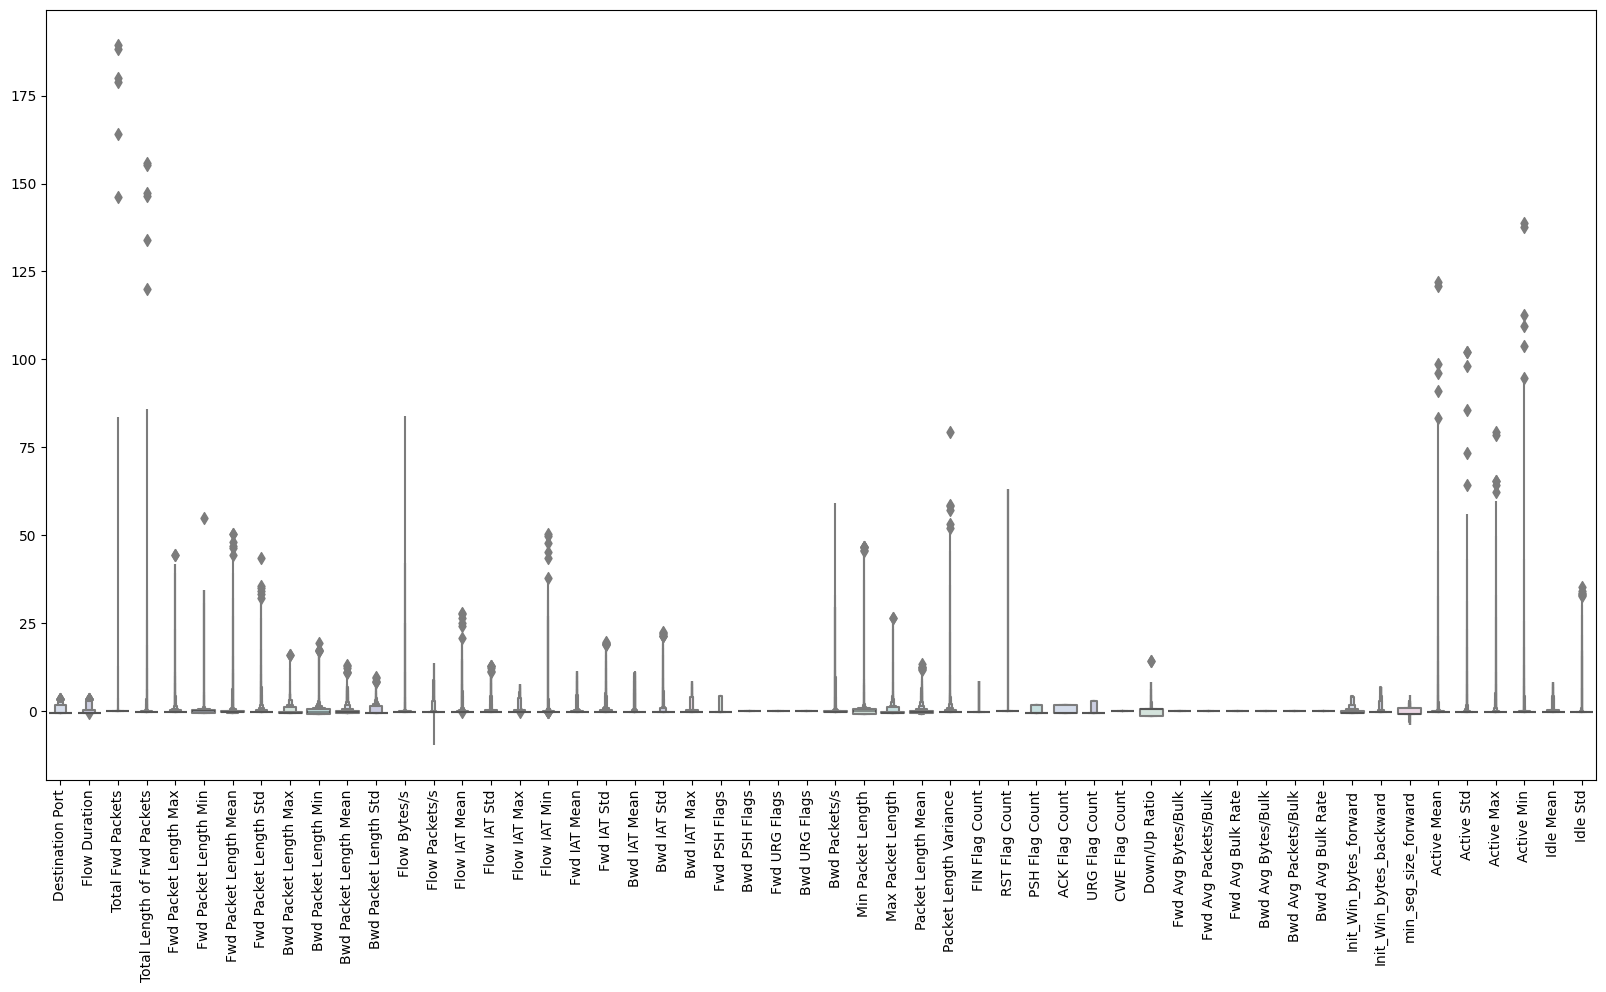

In [29]:
#Detecting outliers
#looking at the scaled features
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [30]:
# Full data for outlier removal and adding the target column
features["Label"] = target

# Dropping rows with outliers
features = features[(features["Total Fwd Packets"] < 10)]
features = features[(features["Total Length of Fwd Packets"] < 10)]
features = features[(features["Fwd Packet Length Max"] <10)]
features = features[(features["Fwd Packet Length Min"] < 10)]
features = features[(features["Fwd Packet Length Mean"] <10)]
features = features[(features["Fwd Packet Length Std"] < 10)]
features = features[(features["Bwd Packet Length Max"] < 10)]
features = features[(features["Bwd Packet Length Min"] < 10)]
features = features[(features["Flow Bytes/s"] < 10)]
features = features[(features["Flow IAT Mean"] < 10)]
features = features[(features["Packet Length Variance"] < 10)]
features = features[(features["Active Mean"] < 10)]
features = features[(features["Active Std"] < 10)]
features = features[(features["Active Max"] < 10)]
features = features[(features["Active Min"] < 10)]
features = features[(features["Idle Mean"] < 10)]
features = features[(features["Idle Std"] < 10)]

# Output the shape after removing outliers
features.shape

(188835, 55)

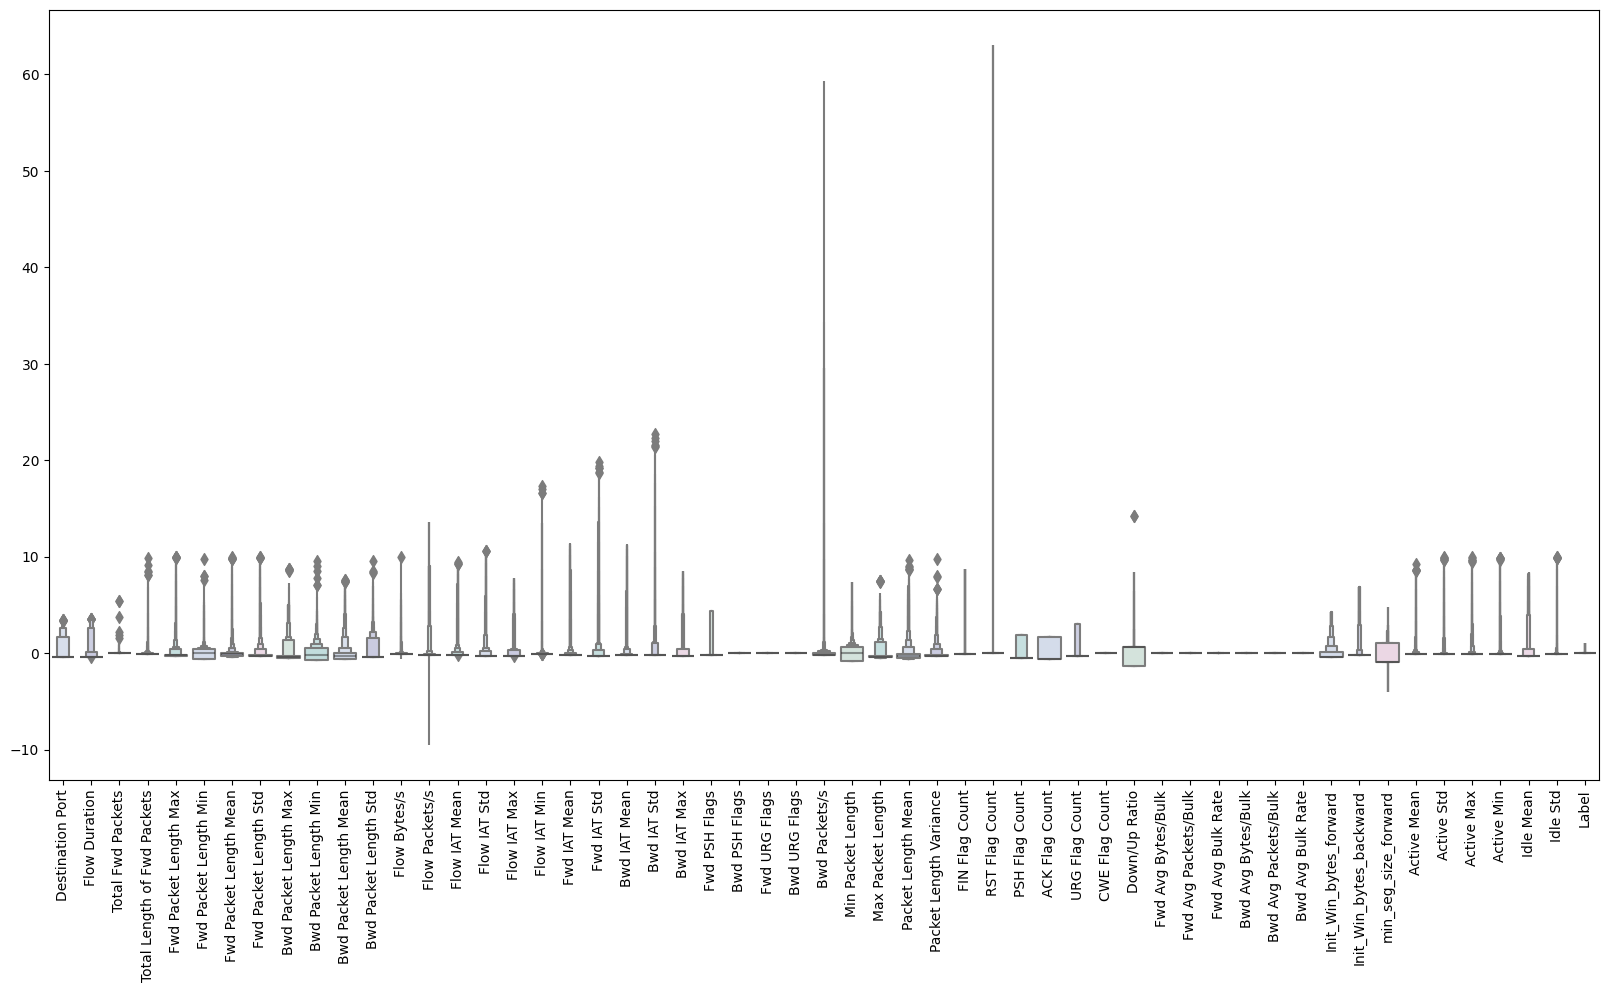

In [31]:
#looking at the scaled features without outliers

plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

## **Model Development**

In [32]:
X = features.drop(["Label"], axis=1)
y = features["Label"]

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X.shape

(188835, 54)

In [33]:
X_train.shape

(151068, 54)

In [34]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [35]:
model = Sequential([
    Dense(64, input_dim=54, activation='relu'),  # Adjust input_dim to match 54 features
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [36]:
# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [37]:
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150
3777/3777 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9646 - loss: 0.1620 - val_accuracy: 0.9960 - val_loss: 0.0201
Epoch 2/150
3777/3777 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9954 - loss: 0.0202 - val_accuracy: 0.9960 - val_loss: 0.0150
Epoch 3/150
3777/3777 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9959 - loss: 0.0148 - val_accuracy: 0.9960 - val_loss: 0.0135
Epoch 4/150
3777/3777 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9958 - loss: 0.0141 - val_accuracy: 0.9961 - val_loss: 0.0127
Epoch 5/150
3777/3777 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9961 - loss: 0.0127 - val_accuracy: 0.9962 - val_loss: 0.0122
Epoch 6/150
3777/3777 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9960 - loss: 0.0127 - val_accuracy: 0.9962 - val_loss: 0.0119
Epoch 7/150
3777/3777 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9958 - loss: 0.0129 - val_accuracy: 0.9962 - val_loss: 0.0116
Epoch 8/150
3777/3777 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9960 - loss: 0

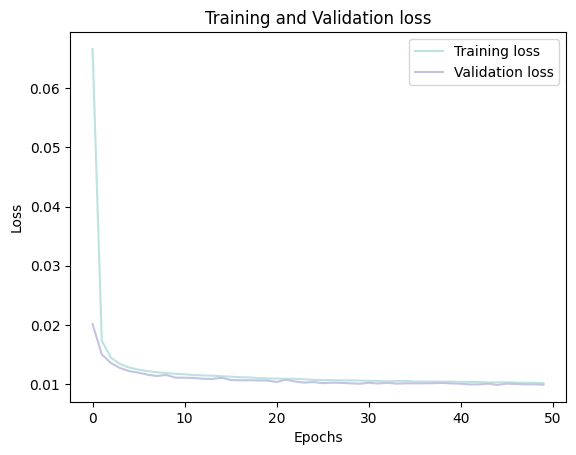

In [38]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

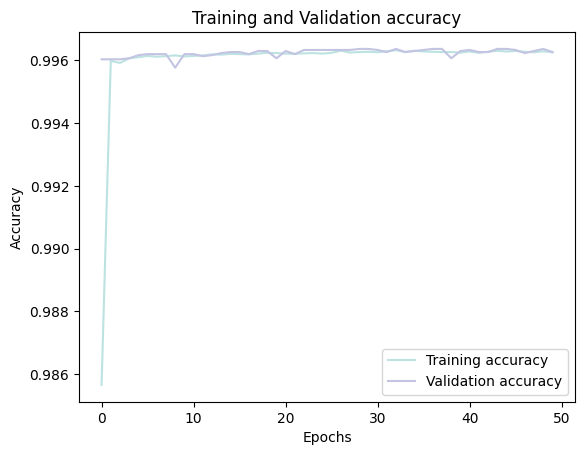

In [39]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **Validation, Visualization and Accuracy**

In [40]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

1181/1181 ━━━━━━━━━━━━━━━━━━━━ 1s 979us/step


<Axes: >

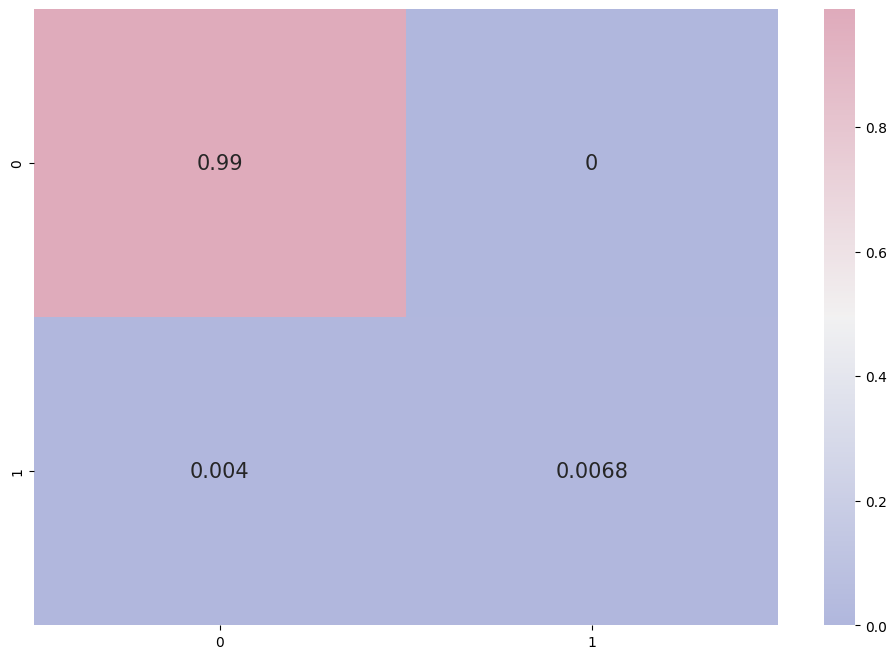

In [41]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37360
           1       1.00      0.63      0.77       407

    accuracy                           1.00     37767
   macro avg       1.00      0.81      0.89     37767
weighted avg       1.00      1.00      1.00     37767

